# Dynamic Setpoint Optimization Using Metaheuristic Algorithms for Wastewater Treatment Plants

Notebook developed with the purpose of implementing an Artificial Neural Network to approximate the consumption of electric energy of a WWTP represented by the BSM2 simulator.

The details indicated in the algorithm can be verified in the paper "Dynamic Setpoint Optimization Using Metaheuristic Algorithms for Wastewater Treatment Plants." DOI: https://doi.org/10.1109/IECON49645.2022.9968617

In [1]:
# Load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load datasets from collection points 7 and 8
df7 = pd.read_excel('dados77.xlsx')
df8 = pd.read_excel('dado88.xlsx') 

In [3]:
df7.head()

,time,Si,Ss,Xi,Xs,Xbh,Xba,Xp,SO,SNO,SNH,SND,XND,Salk,TSS,fr,temp
0,245.010417,31.805034,0.820141,1099.174801,30.927721,1566.037831,115.033005,699.936248,2.207069,10.026073,0.262887,0.667722,2.180412,4.417269,2633.332205,97625.283568,19.566300
1,245.020833,31.821101,0.810147,1101.433422,30.574771,1568.783407,115.231843,701.542307,1.977409,9.876943,0.241047,0.662336,2.164546,4.432755,2638.174313,97116.345401,19.568732
2,245.031250,31.834201,0.800578,1103.811170,30.237582,1571.589155,115.440158,703.247609,2.093825,9.715048,0.226768,0.656635,2.150074,4.449164,2643.244255,96716.725093,19.570673
3,245.041667,31.844835,0.790999,1106.154931,29.897576,1574.261434,115.644316,704.951007,2.011301,9.562053,0.211353,0.651654,2.135271,4.464307,2648.181947,96365.220399,19.572190
4,245.052083,31.853449,0.782380,1108.313993,29.589019,1576.575797,115.826734,706.552447,2.083620,9.400346,0.204928,0.646326,2.122152,4.480220,2652.643493,96035.681197,19.573351


In [4]:
df8.head()

,time,Si,Ss,Xi,Xs,Xbh,Xba,Xp,SO,SNO,SNH,SND,XND,Salk,TSS,fr,temp
0,245.010417,31.705753,0.718130,1094.900473,26.620386,1556.404846,114.580152,698.602010,1.866167,10.972249,0.081746,0.630731,1.984651,4.318153,2618.330900,35681.283568,19.554016
1,245.020833,31.736743,0.712773,1096.464113,26.443126,1558.270351,114.708109,699.709012,1.686938,10.820414,0.079283,0.627334,1.976410,4.335136,2621.696034,35172.345401,19.557920
2,245.031250,31.762887,0.707516,1098.241463,26.272002,1560.343071,114.855909,700.974411,1.670356,10.657846,0.078418,0.623371,1.969085,4.352920,2625.515142,34772.725093,19.561313
3,245.041667,31.784849,0.702101,1100.182687,26.096724,1562.560958,115.019098,702.365853,1.573853,10.493925,0.076912,0.619816,1.961673,4.370546,2629.668990,34421.220399,19.564216
4,245.052083,31.803216,0.697059,1102.207907,25.936163,1564.801530,115.189262,703.831070,1.532898,10.323276,0.077212,0.615846,1.955353,4.388486,2633.974449,34091.681197,19.566662


In [5]:
# Copy the dissolved oxygen values from dataset 8 to 7
df7['DO'] = df8['SO']  

In [6]:
df7.head()

,time,Si,Ss,Xi,Xs,Xbh,Xba,Xp,SO,SNO,SNH,SND,XND,Salk,TSS,fr,temp,DO
0,245.010417,31.805034,0.820141,1099.174801,30.927721,1566.037831,115.033005,699.936248,2.207069,10.026073,0.262887,0.667722,2.180412,4.417269,2633.332205,97625.283568,19.566300,1.866167
1,245.020833,31.821101,0.810147,1101.433422,30.574771,1568.783407,115.231843,701.542307,1.977409,9.876943,0.241047,0.662336,2.164546,4.432755,2638.174313,97116.345401,19.568732,1.686938
2,245.031250,31.834201,0.800578,1103.811170,30.237582,1571.589155,115.440158,703.247609,2.093825,9.715048,0.226768,0.656635,2.150074,4.449164,2643.244255,96716.725093,19.570673,1.670356
3,245.041667,31.844835,0.790999,1106.154931,29.897576,1574.261434,115.644316,704.951007,2.011301,9.562053,0.211353,0.651654,2.135271,4.464307,2648.181947,96365.220399,19.572190,1.573853
4,245.052083,31.853449,0.782380,1108.313993,29.589019,1576.575797,115.826734,706.552447,2.083620,9.400346,0.204928,0.646326,2.122152,4.480220,2652.643493,96035.681197,19.573351,1.532898


In [7]:
# Write excel
df_energia = pd.read_excel('energia.xlsx')

In [8]:
df_energia.head()

,AE
0,3741.481968
1,3829.925070
2,3256.604697
3,3480.071759
4,3045.850356


In [9]:
print('df1:', df7.shape)
print('df2:', df8.shape)
print('df3:', df_energia.shape)

df1: (34944, 18)
df2: (34944, 17)
df3: (34944, 1)


In [17]:
# Form only one dataset
df7['AE'] = df_energia['AE']  

In [18]:
df7.head()

,time,Si,Ss,Xi,Xs,Xbh,Xba,Xp,SO,SNO,SNH,SND,XND,Salk,TSS,fr,temp,DO,AE
0,245.010417,31.805034,0.820141,1099.174801,30.927721,1566.037831,115.033005,699.936248,2.207069,10.026073,0.262887,0.667722,2.180412,4.417269,2633.332205,97625.283568,19.566300,1.866167,3741.481968
1,245.020833,31.821101,0.810147,1101.433422,30.574771,1568.783407,115.231843,701.542307,1.977409,9.876943,0.241047,0.662336,2.164546,4.432755,2638.174313,97116.345401,19.568732,1.686938,3829.925070
2,245.031250,31.834201,0.800578,1103.811170,30.237582,1571.589155,115.440158,703.247609,2.093825,9.715048,0.226768,0.656635,2.150074,4.449164,2643.244255,96716.725093,19.570673,1.670356,3256.604697
3,245.041667,31.844835,0.790999,1106.154931,29.897576,1574.261434,115.644316,704.951007,2.011301,9.562053,0.211353,0.651654,2.135271,4.464307,2648.181947,96365.220399,19.572190,1.573853,3480.071759
4,245.052083,31.853449,0.782380,1108.313993,29.589019,1576.575797,115.826734,706.552447,2.083620,9.400346,0.204928,0.646326,2.122152,4.480220,2652.643493,96035.681197,19.573351,1.532898,3045.850356


In [19]:
df7.shape

(34944, 19)

In [20]:
df7.describe()

,time,Si,Ss,Xi,Xs,Xbh,Xba,Xp,SO,SNO,SNH,SND,XND,Salk,TSS,fr,temp,DO,AE
count,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000,34944.000000
mean,427.005208,28.733212,0.797853,1275.882513,35.793508,2157.104141,150.664447,738.298169,2.000411,10.048483,1.103768,0.630324,2.542496,4.525987,3268.307083,103607.854541,15.026644,1.574412,4225.432616
std,105.079252,3.665875,0.144166,228.486791,6.911802,558.013458,36.169236,102.153364,0.111395,1.885541,1.259130,0.111365,0.393098,0.358537,675.444847,8411.031553,3.538536,0.420866,1234.574922
min,245.010417,8.593981,0.520098,852.186029,17.585849,1049.805158,86.369108,472.840173,1.367898,4.554680,0.078074,0.418930,1.365156,3.553858,1994.799807,88188.428439,9.855152,0.492307,1345.764730
25%,336.007813,28.016771,0.688719,1080.778632,30.990519,1672.236908,117.929619,657.826960,1.927519,8.806747,0.309755,0.549652,2.292746,4.284304,2682.995368,97422.219056,11.489626,1.265765,3193.232390
50%,427.005208,29.569010,0.788685,1225.317297,35.725755,2087.030678,147.289322,706.514241,2.001998,10.059437,0.625218,0.619513,2.553845,4.491682,3150.188701,102411.686496,15.029189,1.628438,4185.616522
75%,518.002604,30.934873,0.890717,1490.490301,40.605121,2682.661240,185.677557,812.798428,2.074423,11.389601,1.355628,0.700939,2.804749,4.717477,3918.594736,108052.374698,18.564211,1.906494,5125.729826
max,609.000000,34.581481,1.616610,1728.440091,66.087255,3263.785745,216.513026,1056.747975,2.453495,16.059053,10.762805,1.222484,4.308438,5.979058,4566.759463,143018.234927,20.168638,2.565408,8409.336039


Text(0.5, 1.0, 'Correlation Heatmap - AE')

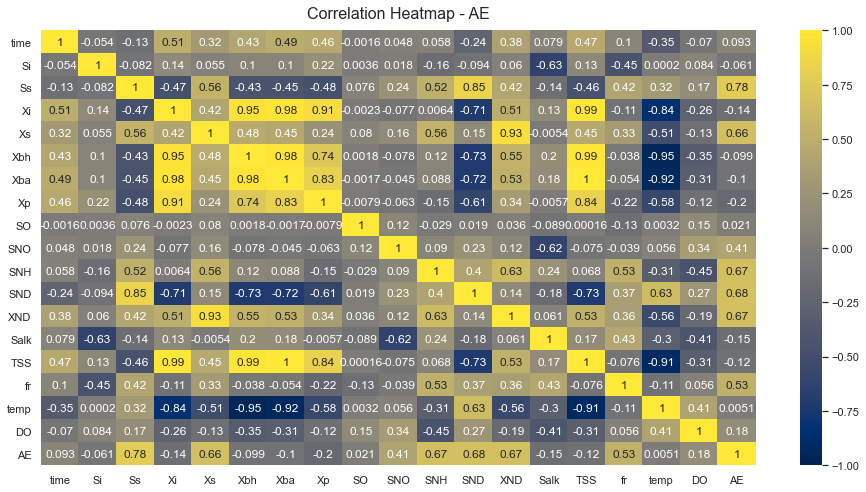

In [21]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(df7.corr(), annot=True,vmin=-1, vmax=1,center= 0, cmap='cividis')
heatmap.set_title('Correlation Heatmap - AE', fontdict={'fontsize':16}, pad=12) 

The model will be made with the features (predict AE): AE; DO; fr; X_ND; S_ND; S_NH; S_NO

In [14]:
# Adjust graph size
sns.set(rc={'figure.figsize':(15,8)})

<AxesSubplot:xlabel='time', ylabel='AE'>

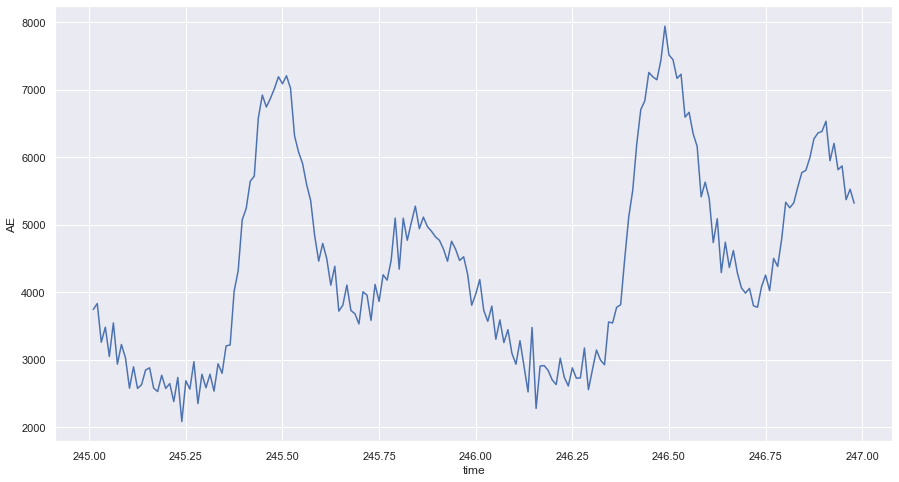

In [22]:
# 10 days
sns.lineplot(x="time", y="AE", data=df7[0:190]) 

In [23]:
# Keras specific modules
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.models import load_model
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf # For model evaluation metrics

Make a dataset with the values fr; X_ND; S_ND; S_NH; S_NO from tank 4, and with the OX values from tank 5, to predict the AE value.

In [24]:
data1 = df7.filter(['DO', 'XND', 'SND', 'SNH', 'Ss', 'AE'], axis=1)  

In [25]:
data1.head()

,DO,XND,SND,SNH,Ss,AE
0,1.866167,2.180412,0.667722,0.262887,0.820141,3741.481968
1,1.686938,2.164546,0.662336,0.241047,0.810147,3829.925070
2,1.670356,2.150074,0.656635,0.226768,0.800578,3256.604697
3,1.573853,2.135271,0.651654,0.211353,0.790999,3480.071759
4,1.532898,2.122152,0.646326,0.204928,0.782380,3045.850356


In [27]:
df_treino = data1[0:33983] # Training and test set.
df_teste_final = data1[33984:34944] # 10 days(holdout sample) for the final test.

In [28]:
# Create independent(x) and dependent(y) variable columns
df_ann_x = df_treino.filter(['DO', 'XND', 'SND', 'SNH', 'Ss'], axis=1)
df_ann_y = df_treino.filter(['AE'], axis=1)

In [29]:
df_ann_x.head()

,DO,XND,SND,SNH,Ss
0,1.866167,2.180412,0.667722,0.262887,0.820141
1,1.686938,2.164546,0.662336,0.241047,0.810147
2,1.670356,2.150074,0.656635,0.226768,0.800578
3,1.573853,2.135271,0.651654,0.211353,0.790999
4,1.532898,2.122152,0.646326,0.204928,0.782380


In [30]:
df_ann_y.head()

,AE
0,3741.481968
1,3829.925070
2,3256.604697
3,3480.071759
4,3045.850356


In [25]:
# Normalize the data
#scaler_x = MinMaxScaler(feature_range = (0,1))
#scaler_y = MinMaxScaler(feature_range = (0,1))
# Fit the scaler using available training data
#input_scaler = scaler_x.fit(df_ann_x)
#output_scaler = scaler_y.fit(df_ann_y)
# Apply the scaler to training data
#train_y_norm = output_scaler.transform(df_ann_y)
#train_x_norm = input_scaler.transform(df_ann_x)

In [31]:
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df_ann_x, df_ann_y, test_size=0.30, random_state=40)
print(f'Conjuntos de treino: x:{X_train.shape}, y:{y_train.shape}')
print(f'Conjuntos de teste: x:{X_test.shape}, y:{y_test.shape}')

Conjuntos de treino: x:(23788, 5), y:(23788, 1)
Conjuntos de teste: x:(10195, 5), y:(10195, 1)


In [32]:
# Set the model
model = Sequential()
model.add(Dense(500, input_dim=df_ann_x.shape[1], activation= "relu"))
model.add(Dense(200, activation= "relu"))
model.add(Dense(200, activation= "relu"))
model.add(Dense(200, activation= "relu"))
model.add(Dense(200, activation= "relu"))
model.add(Dense(100, activation= "relu"))
model.add(Dense(1))
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               3000      
_________________________________________________________________
dense_1 (Dense)              (None, 200)               100200    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [34]:
# Compilar o modelo
model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae'])
model_ann = model.fit(X_train, y_train, epochs=20)

Epoch 1/20
744/744 [==============================] - 5s 5ms/step - loss: 938521.5625 - mse: 938521.5625 - mae: 527.8884
Epoch 2/20
744/744 [==============================] - 3s 4ms/step - loss: 126762.8281 - mse: 126762.8281 - mae: 275.4175
Epoch 3/20
744/744 [==============================] - 3s 4ms/step - loss: 126904.4922 - mse: 126904.4922 - mae: 274.5831
Epoch 4/20
744/744 [==============================] - 3s 4ms/step - loss: 121120.2422 - mse: 121120.2422 - mae: 268.2808
Epoch 5/20
744/744 [==============================] - 3s 4ms/step - loss: 116602.3906 - mse: 116602.3906 - mae: 263.6466
Epoch 6/20
744/744 [==============================] - 3s 4ms/step - loss: 112695.0391 - mse: 112695.0391 - mae: 258.6308
Epoch 7/20
744/744 [==============================] - 3s 4ms/step - loss: 111992.7969 - mse: 111992.7969 - mae: 258.6054
Epoch 8/20
744/744 [==============================] - 3s 4ms/step - loss: 115165.6562 - mse: 115165.6562 - mae: 262.3536
Epoch 9/20
744/744 [============

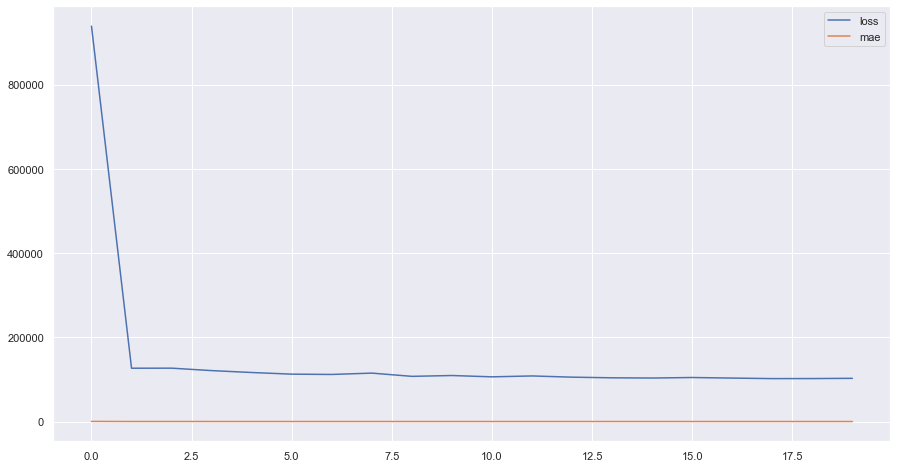

In [35]:
# Plot the loss and validation loss of the dataset
history_df = pd.DataFrame(model_ann.history)
plt.plot(history_df['loss'], label='loss')
plt.plot(history_df['mae'], label='mae')
plt.legend()

In [36]:
# Save trained model 
#model.save('model_ann_AE3.h5')

In [37]:
# load model
model_ann = load_model("model_ann_AE3.h5")

In [38]:
# Process test data: Create independent(x) and dependent(y) variable columns
df_final_x = df_teste_final.filter(['DO', 'XND', 'SND', 'SNH', 'Ss'], axis=1)
df_final_y = df_teste_final.filter(['AE'], axis=1)

In [39]:
print(df_final_x.shape)
print(df_final_y.shape)

(960, 5)
(960, 1)


In [40]:
df_final_x.head()

,DO,XND,SND,SNH,Ss
33984,1.929112,2.146860,0.701637,0.626263,1.042521
33985,2.055194,2.128554,0.697527,0.604013,1.027499
33986,2.042074,2.109449,0.692110,0.601947,1.014745
33987,2.043016,2.091143,0.686351,0.612877,1.003896
33988,1.834277,2.076434,0.680353,0.647683,0.994606


In [41]:
# Make prediction with trained model
previsao_ann = model_ann.predict(df_final_x)

In [43]:
# Create dataframe with actual and forecast values
df2 = df_final_y.reset_index()

In [44]:
column_names = ["real", "previsto"]
df3 = pd.DataFrame(columns = column_names)

In [45]:
df3['real'] = df2['AE'] 
df3['previsto'] = previsao_ann 

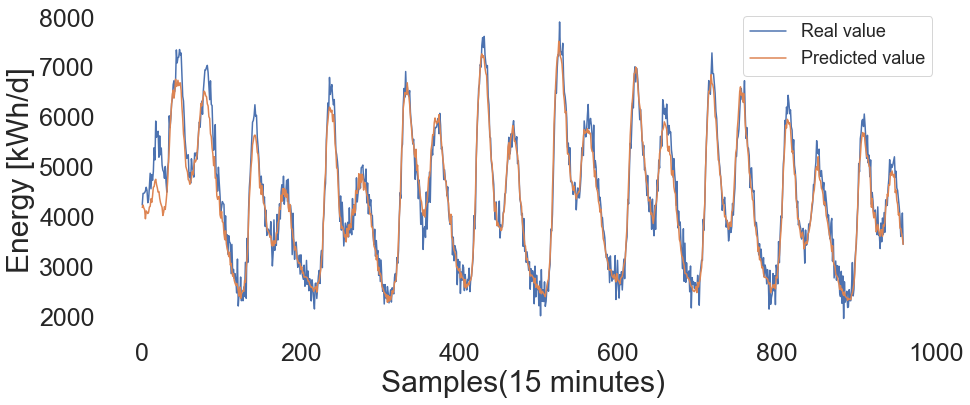

In [46]:
# AE graph
plt.rcParams['axes.facecolor'] = 'white'
plt.figure(figsize = (15, 6))
plt.plot(df3.real)
plt.plot(df3.previsto)
#plt.title('Artificial neural network(ANN - Modelo 2)', family='Arial', fontsize=14)
plt.xlabel('Samples(15 minutes)', fontsize=30)
plt.ylabel('Energy [kWh/d]', fontsize=30)
plt.legend(['Real value', 'Predicted value'], loc='upper right', fontsize=18)

plt.rcParams['axes.facecolor'] = 'white'
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)

plt.savefig('ann_energy5.pdf', dpi=600, format='pdf', bbox_inches='tight')